In [1]:
import numpy as np
import copy 
import random

# The explaination for this part is very similar to part C

# Environemnts 

rewards = np.ones((36,4))*-1

    
    
for i in range(5):
    rewards[1+6*i,0] = -5
    rewards[4+6*i,1] = -5
    rewards[4+6*i,3] = -5

    
rewards[8,0] = -5
rewards[3,1] = -5
rewards[15,1] = -5
rewards[21,1] = -5
rewards[34,0] = -5
rewards[34,1] = -5
rewards[34,2] = -5
rewards[34,3] = -5
rewards[4,2] = -5
rewards[16,2] = -5
rewards[7,2] = -5
rewards[9,3] = -5
rewards[21,3] = -5
rewards[27,3] = -5


rewards[27,0] = 50
rewards[25,1] = 50
rewards[31,0] = 50
rewards[31,1] = 50
rewards[31,2] = 50
rewards[31,3] = 50

In [2]:
# Parameters
gamma = 1
alpha = 0.05
num_episode = 50000
min_difference = 1e-12
goal_state = 32
epsilon = 0.1

In [3]:
def next_State(state, action):
    if state<30:
        if action == 0:
            state_next = state + 5
        elif action == 1:
            state_next = state + 7
        elif action == 2:
            state_next = state + 6
        elif action == 3:
            state_next = state + 1
    else:
        state_next = state + 1
    return state_next

In [4]:
def Action_greedy(state):
    if np.random.uniform(0,1) < epsilon:
        # Choose a random action
        action = random.randint(0, 3)
    else:
        # Choose the action of a greedy policy
        action = np.argmax(rewards[state])
    return action

In [5]:
def Check_break(cur_state): #Check if the agent is in a wrong state finish the episode
    Br = [0, 5, 6, 10, 11, 12, 13, 17, 18, 22, 23, 24, 28,29,30,35]
    for i in Br:
        if(i == cur_state):
            return 1
    else:
        return 0

In [6]:
def Sarsa(Start_Point, rewards, goal_state=None, gamma=0.99, alpha=0.01, num_episode=1000, min_difference=1e-5):
    
    Sum_reward = np.zeros(num_episode)
    Q = np.zeros(rewards.shape) #Initiate the values of Q to zero
    all_states = np.arange(len(rewards)) #the number of zeros
    all_states = np.delete(all_states, [0, 5, 6, 10, 11, 12, 13, 17, 18, 22, 23, 24, 28,29,30,35], 0) #delete the states that agent cannot start in them
    for i in range(num_episode):
        Q_old = copy.deepcopy(Q) #Copy the current Q to Qold
        # initialize state
        initial_state = np.random.choice(all_states) #Choose a random start for starting
        action = Action_greedy(initial_state) #Choose a greedy in the state that we are now
        Sum_reward[i] = Sum_reward[i] + rewards[initial_state][action]
        SS = next_State(initial_state, action) #go to the next state with the action  that agent has done
        action_prime = Action_greedy(SS) #the action that the agent do
        Q[initial_state][action] = Q[initial_state][action] + alpha * (rewards[initial_state][action] + gamma * Q[SS][action_prime] - Q[initial_state][action]) #value for Q
        cur_state = SS #Current state
        
        # loop for each step of episode, until reaching goal state
        counter = 1
        while cur_state != goal_state: #Do the loop till reaching to the state goal
            Check = Check_break(cur_state) #check if we are in the wrong state and if we are break the loop
            if Check == 1:
                break
            # choose action form states using policy derived from Q
            action = action_prime #Action
            Sum_reward[i] = Sum_reward[i] + rewards[cur_state][action]
            counter = counter + 1
            SS = next_State(cur_state, action) #New State
            
            action_prime = Action_greedy(SS) #New Action
            Q[cur_state][action] = Q[cur_state][action] + alpha * (rewards[cur_state][action] + gamma * Q[SS][action_prime] - Q[cur_state][action])
            cur_state = SS #Current state
            
        if cur_state != goal_state:
            Sum_reward[i] = -2
        else: 
            Sum_reward[i] = Sum_reward[i] / counter

    return Q,Sum_reward

In [7]:
Q, Sum_reward = Sarsa(1, rewards, goal_state=goal_state, gamma=gamma, alpha=alpha, num_episode=num_episode, min_difference=min_difference)           
Q #the third column is for action of "Up which is not allowed in first 30 states 

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [-4.89328133, 33.65774168, 29.42820278, 29.47017937],
       [33.23509558, 31.20815985, 34.02102857, 32.43473896],
       [35.67467991, -4.8123793 , 32.88336799, 28.43667999],
       [33.98233585, -4.91742313, -4.90850208, -4.86208155],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [-4.99219911, 36.05216646, -4.99426563, 35.81768409],
       [-4.99914047, 38.40183456, 35.63969299, 33.25391161],
       [35.81476816, 30.29799297, 37.98705865, -4.98938787],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [37.33838003, 35.65410307, 39.28044186, 36.44720285],
       [40.56726489, -4.99997748, 35.77998393, 29.98733435],
       [37.07614913, -4.

In [8]:
def navigate(Start_point):
    Start_point = Start_point - 1
    i = 0
    Q_nav = np.array(Q)
    while True:
        i = i + 1
        if np.argmax(Q_nav[Start_point])== 0:
            print("Right-Up")
            Start_point = Start_point + 5
            
        elif np.argmax(Q_nav[Start_point]) == 1:
            print("Right-Down")
            Start_point = Start_point + 7
            
        elif np.argmax(Q_nav[Start_point]) == 2:
            print("Right")
            Start_point = Start_point + 6
        elif np.argmax(Q_nav[Start_point]) == 3:
            print("Down")
            Start_point = Start_point + 1
            
        if Start_point == 32:
            print("Goal !")
            break
        if i > 10:
            break

In [9]:
Start_Point = np.array(2) #Choose any house number in the photo of the question and it will shows you the best direction
navigate(Start_Point)

Right-Down
Right-Down
Right-Up
Right-Up
Right-Down
Goal !


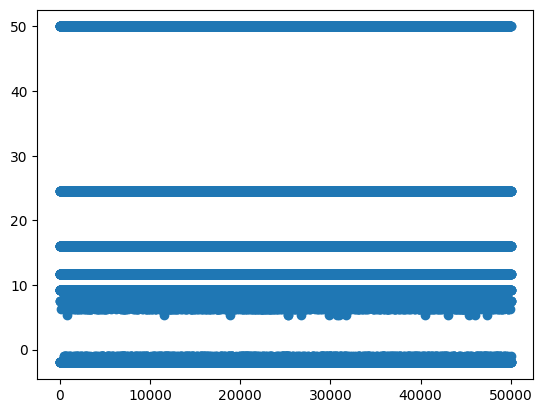

In [10]:
import matplotlib.pyplot as plt

X = np.arange(num_episode)+1

plt.scatter(X, Sum_reward)
plt.show()

In [11]:
Q, R = Sarsa(4, rewards, goal_state=goal_state, gamma=gamma, alpha=alpha, num_episode=num_episode, min_difference=min_difference)           
Q

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [-4.83913871, 36.36374072, 32.46800158, 27.49539571],
       [31.08985452, 32.43637639, 32.85669511, 31.8806788 ],
       [36.32770881, -4.88766456, 33.04875164, 30.30920864],
       [29.36602359, -4.86897747, -4.63451137, -4.84718177],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [-4.98697109, 35.84354702, -4.98991847, 33.71923548],
       [-4.99974903, 37.01999445, 35.15610491, 34.54112272],
       [35.65140579, 33.05186011, 36.74008946, -4.99532932],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [34.98120862, 37.26926085, 40.00499525, 36.50295004],
       [40.27963117, -4.99999541, 35.8486995 , 31.31438587],
       [36.79556839, -4.

In [12]:
Start_Point = np.array(5)
navigate(Start_Point)

Right-Up
Right
Right-Up
Right-Up
Right-Down
Goal !


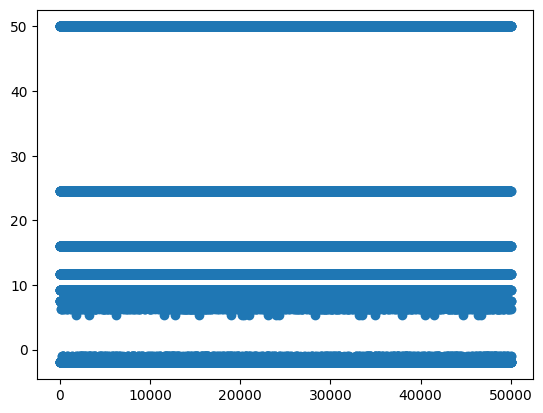

In [13]:
plt.scatter(X, R)
plt.show()